<a href="https://colab.research.google.com/github/Raiyankhan640/Khan_Raiyan_Ibne_Reza_2221236042_CSE445/blob/main/mini_project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import keras_tuner as kt
from keras_tuner import RandomSearch
import matplotlib.pyplot as plt

In [19]:
#Data Preprocessing
df = pd.read_csv("dataframe.csv")
X = df.drop(columns=['Cluster'])
y = df['Cluster']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42
)


In [20]:
df.head()

,Unnamed: 0,Accuracy (%),Reaction Time (s),Cluster
0,0,78.2,2.45,0
1,1,85.6,2.30,1
2,2,91.0,2.18,1
3,3,73.5,2.60,0
4,4,88.9,2.25,1


In [21]:
#Neural Network

def build_model(hp):
    model = keras.Sequential()

    # First layer (input layer + first hidden layer)
    model.add(layers.Dense(
        units=hp.Int('units_0', min_value=32, max_value=256, step=32),
        activation='relu',
        input_shape=(X_train.shape[1],)
    ))
    for i in range(hp.Int('num_layers', 1, 3)):
      model.add(layers.Dense(
        units=hp.Int(f'units_{i+1}', min_value=32, max_value=256, step=32),
        activation='relu'
      ))
    model.add(layers.Dense(len(np.unique(y)), activation='softmax'))

    model.compile(
    optimizer=keras.optimizers.Adam(
        hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
    ),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
    return model


In [22]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='mini project',
    project_name='mini_project_2'
)

tuner.search(X_train, y_train, epochs=20, validation_split=0.2, verbose=1)

Reloading Tuner from mini project/mini_project_2/tuner0.json


In [23]:
best_model = tuner.get_best_models(num_models=1)[0]
best_model.fit(X_train, y_train, epochs=30, validation_split=0.2, verbose=1)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/saving/saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - accuracy: 1.0000 - loss: 0.6197 - val_accuracy: 1.0000 - val_loss: 0.5617
Epoch 2/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - accuracy: 1.0000 - loss: 0.5619 - val_accuracy: 1.0000 - val_loss: 0.5091
Epoch 3/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 1.0000 - loss: 0.5051 - val_accuracy: 1.0000 - val_loss: 0.4563
Epoch 4/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 1.0000 - loss: 0.4460 - val_accuracy: 1.0000 - val_loss: 0.4034
Epoch 5/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step - accuracy: 1.0000 - loss: 0.3850 - val_accuracy: 1.0000 - val_loss: 0.3518
Epoch 6/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - accuracy: 1.0000 - loss: 0.3234 - val_accuracy: 1.0000 - val_loss: 0.3053
Epoch 7/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - accuracy: 1.0000 - loss: 0.2642 - val_accuracy: 1.0000 - val_loss: 0.2649
Epoch 8/30
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - accuracy: 1.0000 - loss: 0.2098 - val_accuracy: 1.0000 - val_loss: 0.2304
Epoch 9/30


In [27]:
#predicting using best parameters
y_pred = np.argmax(best_model.predict(X_test), axis=1)
accuracy_score(y_test, y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


1.0

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


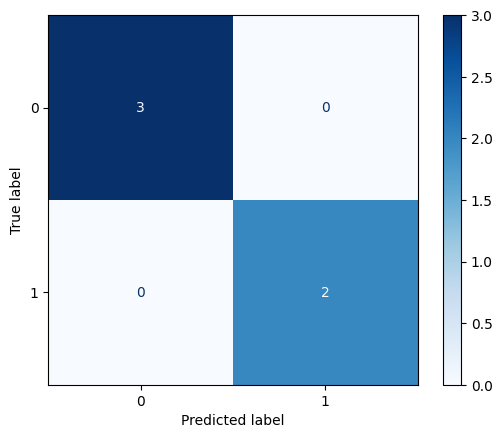

In [24]:
#plotting confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


In [ ]:
#Random Forest
